# TMDB Movie Box Office Revenue Prediction

I'll analyze the TMDB movie dataset and build modles(XGBoost, LightGBM, CatBoost, Ensembling model) for Kaggle competition submission. The data contains the following fields:

- 'id', 'imdb_id': ID variable
- 'budget', 'popularity', 'runtime', 'revenue': Numerical Variables
- belongs_to_collection', 'genres', 'homepage','original_language', 'original_title', 'spoken_languages', 'status':     Binary variable, Dummy variable (always 1)
- 'overview', 'tagline', 'title', 'Keywords': String value, Textual variable
- 'production_companies','production_countries', 'cast', 'crew': Dictionary variables
- 'release_date': Datetime variable, MM/DD/YYYY

Let's start with some data analysis and visualisation imports, and models buildings. 

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
test.shape

(4398, 22)

In [5]:
train = pd.read_csv("data/train.csv")
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.shape

(3000, 23)

In [7]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000
#test
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


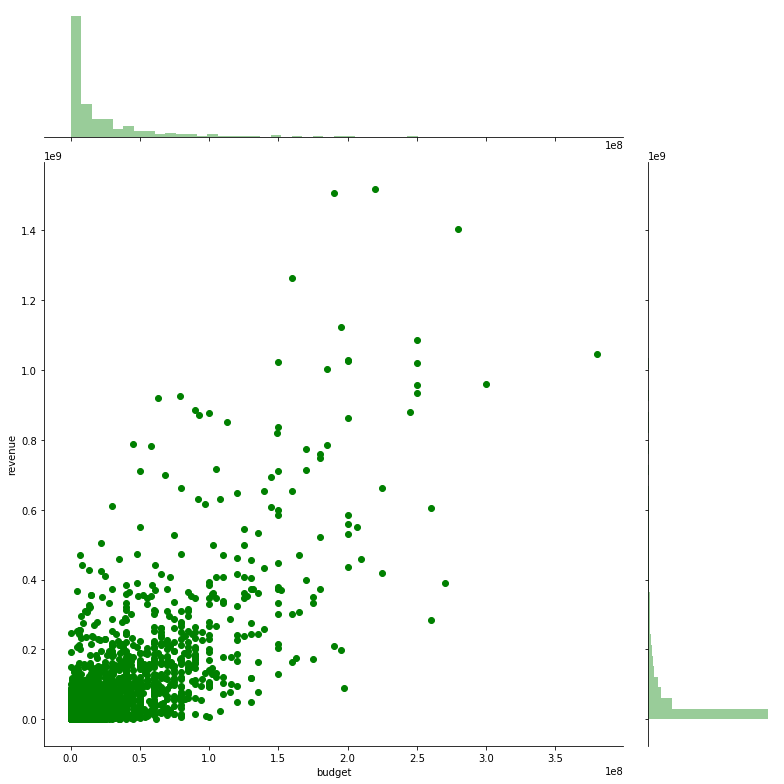

In [8]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

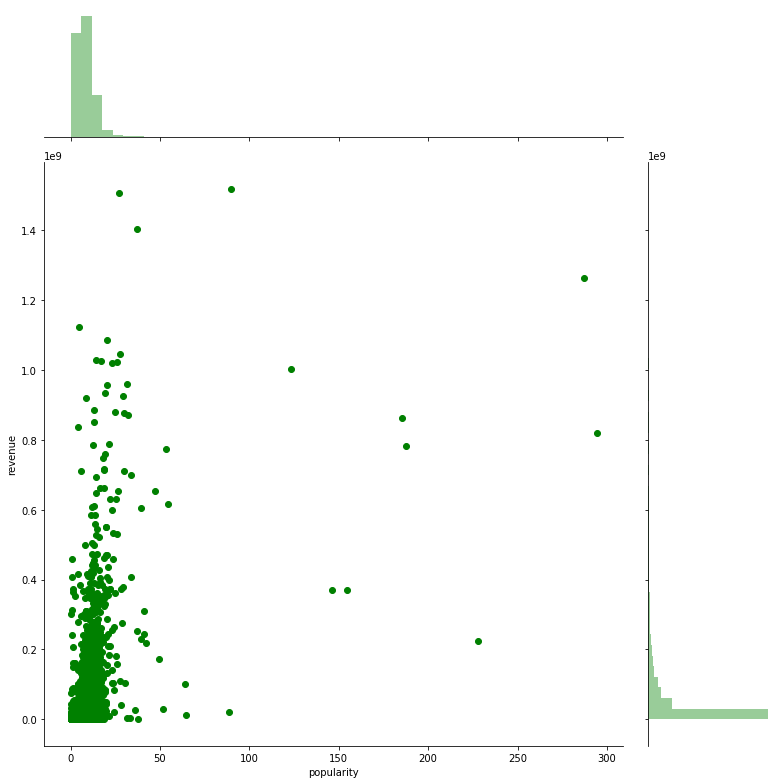

In [9]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

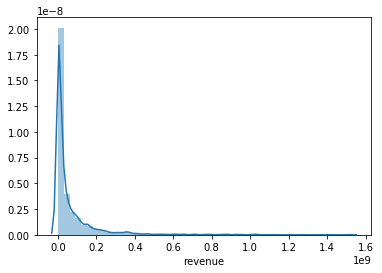

In [10]:
sns.distplot(train.revenue)

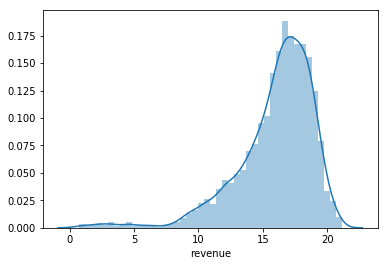

In [11]:
sns.distplot(np.log1p(train['revenue']))

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 1.0, 'Revenue of movies with and without homepage')

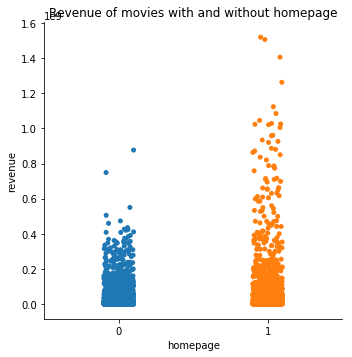

In [1185]:
train_hp = train
train_hp['homepage'].loc[~train_hp['homepage'].isnull()] = 1 
train_hp["homepage"] = train_hp['homepage'].fillna(0)

sns.catplot(x="homepage", y="revenue", data=train_hp)
plt.title('Revenue of movies with and without homepage')

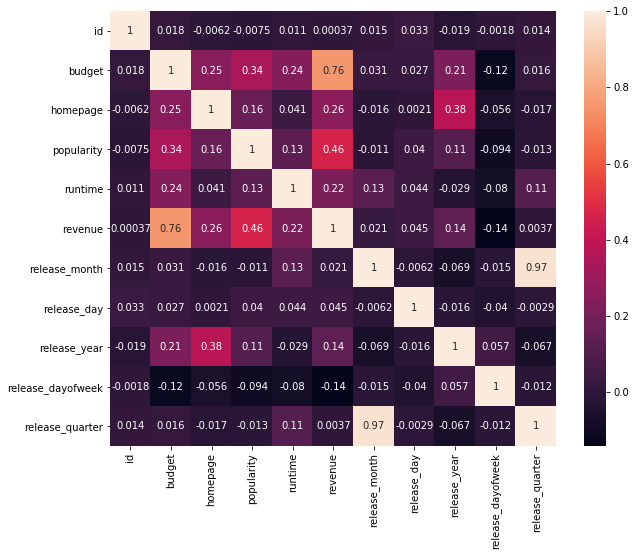

In [1186]:
train_hp[['release_month','release_day','release_year']]= train_hp['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
    
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train_hp.loc[ (train_hp['release_year'] <= 18) & (train_hp['release_year'] < 100), "release_year"] += 2000
train_hp.loc[ (train_hp['release_year'] > 18)  & (train_hp['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train_hp['release_date']) 
train_hp['release_dayofweek'] = releaseDate.dt.dayofweek
train_hp['release_quarter'] = releaseDate.dt.quarter

train_cor = train_hp[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
#all_data = all_data.drop('revenue', axis=1)

### Additional data

In [12]:
add_train_data = pd.read_csv('data/additional data/TrainAdditionalFeatures.csv')
add_train_data.head()

,imdb_id,popularity2,rating,totalVotes
0,tt0169547,16.217,8.0,6016.0
1,tt0119116,26.326,7.4,5862.0
2,tt0325980,28.244,7.7,11546.0
3,tt0266697,18.202,7.9,8638.0
4,tt0418763,9.653,6.6,1201.0


In [13]:
add_train_data.shape

(2887, 4)

In [14]:
add_test_data = pd.read_csv('data/additional data/TestAdditionalFeatures.csv')
add_test_data.head()

,imdb_id,popularity2,rating,totalVotes
0,tt0113101,11.182,6.3,1078.0
1,tt0107286,8.038,6.5,111.0
2,tt0076759,36.016,8.2,10729.0
3,tt0266543,18.503,7.8,10766.0
4,tt0033467,15.322,8.1,2203.0


In [15]:
add_test_data.shape

(4232, 4)

Merge to train and test

In [16]:
train_2 = pd.merge(train, add_train_data, how='left', on=['imdb_id'])
train_2.shape

(3000, 26)

In [17]:
train_2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


In [18]:
test_2 = pd.merge(test, add_test_data, how='left', on=['imdb_id'])
test_2.shape

(4398, 25)

In [19]:
test_2.columns.values

array(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'popularity2', 'rating', 'totalVotes'],
      dtype=object)

In [20]:
test_2 = test_2.drop('popularity2', axis=1)
test_2.shape

(4398, 24)

In [21]:
test_2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,rating,totalVotes
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.6,91.0
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",4.5,51.0
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,176.0
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.0,937.0
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.8,50.0


In [22]:
train_norevenue = train_2.drop('revenue', axis = 1)

In [957]:
#train_norevenue = train_norevenue.drop('revenue', axis = 1)

In [23]:
train_norevenue.columns.values

array(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'popularity2', 'rating', 'totalVotes'],
      dtype=object)

In [24]:
train_norevenue.shape

(3000, 25)

In [25]:
#combine test and train
all_data = pd.concat([train_norevenue, test_2], axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [26]:
all_data.columns.values

array(['Keywords', 'belongs_to_collection', 'budget', 'cast', 'crew',
       'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'popularity2',
       'poster_path', 'production_companies', 'production_countries',
       'rating', 'release_date', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'totalVotes'], dtype=object)

In [27]:
all_data.head()

,Keywords,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,original_language,...,production_companies,production_countries,rating,release_date,runtime,spoken_languages,status,tagline,title,totalVotes
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1,tt2637294,en,...,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.0,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,482.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,2,tt0368933,en,...,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.4,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,1528.0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",NaN,3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,3,tt2582802,en,...,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8.4,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,7314.0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",NaN,1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,4,tt1821480,hi,...,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",7.5,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,115.0
4,NaN,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,5,tt1380152,ko,...,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",NaN,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN


### EDA (Test data)

In [28]:
all_data.isnull().sum()

Keywords                  669
belongs_to_collection    5917
budget                      0
cast                       26
crew                       38
genres                     23
homepage                 5032
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
popularity2              4516
poster_path                 2
production_companies      414
production_countries      157
rating                    297
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
totalVotes                297
dtype: int64

In [29]:
all_data['rating'] = all_data['rating'].fillna(all_data['rating'].mean())

In [30]:
all_data['totalVotes'] = all_data['totalVotes'].fillna(all_data['totalVotes'].mean())

### belongs_to_collection

In [31]:
#process varible "belongs_to_collection", movie within a collection will be 1, without will be 0.

def process_belongs_to_collection(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna(0)
    
    else: 
        variable = variable
        
    variable_l = variable.tolist()
        
    variable_nm = list(map(lambda x: str(x).split(', ')[1].partition("'name': '")[2].replace("'", '') 
                         if x != 0 else 0, variable_l))
        
    all_data['collection_nm'] = variable_nm
    
    all_data['collection_nm'].loc[all_data['collection_nm'] != 0] = 1
    
    print (all_data['collection_nm'].head())
    

In [32]:
if __name__ == "__main__": 
    
    process_belongs_to_collection(all_data['belongs_to_collection'])

0    1
1    1
2    0
3    0
4    0
Name: collection_nm, dtype: int64


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
all_data_1 = all_data.drop('belongs_to_collection', axis=1)
all_data_1.shape

(7398, 25)

### genres

In [34]:
#for each movie, convert genres to dummy variables, geners for each move => 1

def process_genres(variable):

    try:
        d = eval(variable)
    except:
        d = {}
    return d

if __name__ == "__main__": 

    all_data_1 = all_data_1
    all_data_1['genres'] = all_data_1['genres'].map(lambda x: 
                                sorted([d['name'] for d in process_genres(x)])).map(lambda x: ','.join(map(str, x)))
    genres = all_data_1.genres.str.get_dummies(sep=',')
    all_data_1 = pd.concat([all_data_1, genres], axis=1, sort=False)
    print("Action Genres Movie           ", all_data_1[all_data_1.Action == 1].shape[0])
    print("Adventure Genres Movie        ", all_data_1[all_data_1.Adventure == 1].shape[0])
    print("Animation Genres Movie        ", all_data_1[all_data_1.Animation == 1].shape[0])
    print("Comedy Genres Movie           ", all_data_1[all_data_1.Comedy == 1].shape[0])
    print("Crime Genres Movie            ", all_data_1[all_data_1.Crime == 1].shape[0])
    print("Documentary Genres Movie      ", all_data_1[all_data_1.Documentary == 1].shape[0])
    print("Drama Genres Movie            ", all_data_1[all_data_1.Drama == 1].shape[0])
    print("Family Genres Movie           ", all_data_1[all_data_1.Family == 1].shape[0])
    print("Fantasy Genres Movie          ", all_data_1[all_data_1.Fantasy == 1].shape[0])
    print("Foreign Genres Movie          ", all_data_1[all_data_1.Foreign == 1].shape[0])
    print("History Genres Movie          ", all_data_1[all_data_1.History == 1].shape[0])
    print("Music Genres Movie            ", all_data_1[all_data_1.Music == 1].shape[0])
    print("Mystery Genres Movie          ", all_data_1[all_data_1.Mystery == 1].shape[0])
    print("Romance Genres Movie          ", all_data_1[all_data_1.Romance == 1].shape[0])
    print("Science Fiction Genres Movie  ", all_data_1[all_data_1['Science Fiction'] == 1].shape[0])
    print("TV Movie Genres Movie         ", all_data_1[all_data_1['TV Movie'] == 1].shape[0])
    print("Thriller Genres Movie         ", all_data_1[all_data_1.Thriller == 1].shape[0])
    print("War Genres Movie              ", all_data_1[all_data_1.War == 1].shape[0])
    print("Western Genres Movie          ", all_data_1[all_data_1.Western == 1].shape[0])

Action Genres Movie            1735
Adventure Genres Movie         1116
Animation Genres Movie         382
Comedy Genres Movie            2605
Crime Genres Movie             1084
Documentary Genres Movie       221
Drama Genres Movie             3676
Family Genres Movie            675
Fantasy Genres Movie           628
Foreign Genres Movie           84
History Genres Movie           295
Music Genres Movie             267
Mystery Genres Movie           550
Romance Genres Movie           1435
Science Fiction Genres Movie   744
TV Movie Genres Movie          1
Thriller Genres Movie          1869
War Genres Movie               243
Western Genres Movie           117


In [35]:
all_data_1 = all_data_1.drop('genres', axis=1)
all_data_1.shape

(7398, 44)

In [36]:
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,0,0,0,0,0,0,0,0,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",NaN,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,0,0,0,0,1,0,0,0,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",http://sonyclassics.com/whiplash/,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,0,0,0,0,0,0,0,0,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",http://kahaanithefilm.com/,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,0,0,0,0,0,0,0,1,0,0
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",NaN,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,0,0,0,0,0,0,0,1,0,0


### homepage

In [37]:
#convert homepage to 0 or 1, 0 means the movie doesn't have a homepage, otherwise 1.

def process_homepage(variable):
    
    variable.loc[~variable.isnull()] = 1
    
    all_data_1["homepage"] = variable.fillna(0)
    
    print (all_data_1["homepage"].head())

In [38]:
if __name__ == "__main__": 
    
    process_homepage(all_data_1['homepage'])

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int64


### release date

In [39]:
#convert release date mm/dd/yy to three variables for month, date, and year

def process_release_date(variable):
    
    all_data_1[['release_month','release_day','release_year']]= variable.str.split('/',expand=True).replace(np.nan, -1).astype(int)
    
    # Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
    all_data_1.loc[ (all_data_1['release_year'] <= 18) & (all_data_1['release_year'] < 100), "release_year"] += 2000
    all_data_1.loc[ (all_data_1['release_year'] > 18)  & (all_data_1['release_year'] < 100), "release_year"] += 1900
    
    releaseDate = pd.to_datetime(variable) 
    all_data_1['release_dayofweek'] = releaseDate.dt.dayofweek
    all_data_1['release_quarter'] = releaseDate.dt.quarter
    
    print(all_data_1[['release_month','release_day','release_year', 'release_dayofweek', 'release_quarter']].head())

In [40]:
if __name__ == "__main__": 
    
    process_release_date(all_data_1['release_date'])

   release_month  release_day  release_year  release_dayofweek  \
0              2           20          2015                4.0   
1              8            6          2004                4.0   
2             10           10          2014                4.0   
3              3            9          2012                4.0   
4              2            5          2009                3.0   

   release_quarter  
0              1.0  
1              3.0  
2              4.0  
3              1.0  
4              1.0  


In [41]:
all_data_1 = all_data_1.drop('release_date', axis=1)

In [42]:
all_data_1.shape

(7398, 48)

In [43]:
all_data_1['release_dayofweek'] = all_data_1['release_dayofweek'].fillna(0.0)

In [44]:
all_data_1['release_quarter'] = all_data_1['release_quarter'].fillna(0.0)

### budget

In [45]:
#convert budget to log, and generate variables including: budget_runtime_ratio, 
#budget_popularity_ratio, budget_year_ratio, meanBudgetByYear

def process_budget(variable):
    
    all_data_1['budget_log'] = np.log1p(variable)
    
    ### budget runtime ratio
    all_data_1["budget_runtime_ratio"] = all_data_1['budget_log']/all_data_1['runtime'] 
    
    ### budget popularity ratio
    all_data_1['budget_popularity_ratio'] = all_data_1['budget_log']/all_data_1['popularity']
    
    ### budget year ratio
    all_data_1['budget_year_ratio'] = all_data_1['budget_log']/(all_data_1['release_year']*all_data_1['release_year'])

    print(all_data_1[['budget_log',"budget_runtime_ratio", 
                  'budget_popularity_ratio', 
                 'budget_year_ratio']].head())


In [46]:
if __name__ == "__main__": 
    
    process_budget(all_data_1['budget'])

   budget_log  budget_runtime_ratio  budget_popularity_ratio  \
0   16.454568              0.176931                 2.502446   
1   17.504390              0.154906                 2.122028   
2   15.009433              0.142947                 0.233428   
3   13.997833              0.114736                 4.408855   
4    0.000000              0.000000                 0.000000   

   budget_year_ratio  
0           0.000004  
1           0.000004  
2           0.000004  
3           0.000003  
4           0.000000  


In [47]:
 ### mean budget by year
meanBudgetByYear = all_data_1.groupby('release_year')['budget_log'].aggregate('mean')

In [48]:
meanBudgetByYear.head()

release_year
1921    12.429220
1922    13.910822
1923     5.707110
1924    13.942720
1925     9.874763
Name: budget_log, dtype: float64

In [49]:
all_data_1 = pd.merge(all_data_1, pd.DataFrame(meanBudgetByYear), on = 'release_year', how='left')
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,release_month,release_day,release_year,release_dayofweek,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,budget_log_y
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2,20,2015,4.0,1.0,16.454568,0.176931,2.502446,0.000004,11.191350
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,8,6,2004,4.0,3.0,17.504390,0.154906,2.122028,0.000004,13.762006
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,10,10,2014,4.0,4.0,15.009433,0.142947,0.233428,0.000004,10.959215
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,3,9,2012,4.0,1.0,13.997833,0.114736,4.408855,0.000003,11.181553
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,2,5,2009,3.0,1.0,0.000000,0.000000,0.000000,0.000000,12.768596


In [50]:
all_data_1 = all_data_1.rename(columns = {'budget_log_y': 'meanBudgetByYear'})
all_data_1.head()

,Keywords,budget,cast,crew,homepage,id,imdb_id,original_language,original_title,overview,...,release_month,release_day,release_year,release_dayofweek,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,meanBudgetByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2,20,2015,4.0,1.0,16.454568,0.176931,2.502446,0.000004,11.191350
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,8,6,2004,4.0,3.0,17.504390,0.154906,2.122028,0.000004,13.762006
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,10,10,2014,4.0,4.0,15.009433,0.142947,0.233428,0.000004,10.959215
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,3,9,2012,4.0,1.0,13.997833,0.114736,4.408855,0.000003,11.181553
4,NaN,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,2,5,2009,3.0,1.0,0.000000,0.000000,0.000000,0.000000,12.768596


In [51]:
#all_data_3 = all_data_3.drop(['meanBudgetByYear'], axis=1)
all_data_1.shape

(7398, 53)

In [52]:
all_data_1 = all_data_1.drop('budget', axis=1)
all_data_1.shape

(7398, 52)

In [53]:
all_data_1['budget_runtime_ratio'] = all_data_1['budget_runtime_ratio'].fillna(0.0)

### original language

In [54]:
#process original language - EN as 1, non-EN as 0

def process_original_language(variable):
    
    all_data_1.loc[variable =='en', 'original_language'] = 1
    
    all_data_1.loc[variable !=1, 'original_language'] = 0
    
    print(all_data_1['original_language'].head())

In [55]:
if __name__ == "__main__": 
    
    process_original_language(all_data_1['original_language'])

0    1
1    1
2    1
3    0
4    0
Name: original_language, dtype: int64


### title

In [56]:
#process title (variable_1) and original_title (variable_2) together, istitledifferent, if yes, then 1, if no then 0

def process_original_title(variable_1, variable_2):
    
    all_data_1['isTitleDifferent'] = 1

    all_data_1.loc[variable_2 == variable_1 ,"isTitleDifferent"] = 0 
    
    all_data_1['original_title_letter_count'] = variable_2.str.len() 
    
    all_data_1['original_title_word_count'] = variable_2.str.split().str.len() 

    all_data_1['title_word_count'] = variable_1.str.split().str.len()
    
    print (all_data_1[['isTitleDifferent', 'original_title_letter_count', 
                   'original_title_word_count', 'title_word_count' ]].head())

In [57]:
if __name__ == "__main__": 
    
    process_original_title(all_data_1['title'],all_data_1['original_title'])

   isTitleDifferent  original_title_letter_count  original_title_word_count  \
0                 0                           22                          5   
1                 0                           40                          6   
2                 0                            8                          1   
3                 0                            7                          1   
4                 1                            4                          1   

   title_word_count  
0               5.0  
1               6.0  
2               1.0  
3               1.0  
4               2.0  


In [58]:
all_data_1 = all_data_1.drop('title', axis=1)

In [59]:
all_data_1 = all_data_1.drop('original_title', axis=1)

In [60]:
all_data_1.shape

(7398, 54)

In [61]:
#rename Crime, Comedy, Family, War

all_data_1 = all_data_1.rename(columns={'Crime': 'Crime_genre', 'Comedy': 'Comedy_genre', 
                                        'Family':'Family_genre', 'War':'War_genre'})

In [62]:
all_data_1 = all_data_1.rename(columns={'crew': 'crews'})

In [63]:
all_data_1['title_word_count'] = all_data_1['title_word_count'].fillna(0.0)

### overview

In [64]:
import spacy
from gensim.parsing.preprocessing import *
import gensim
from gensim import corpora
import nltk
import string
from gensim.utils import simple_preprocess
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from wordcloud import WordCloud
from gensim import models
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

In [1001]:
#train['overview'].isnull().sum()
#train["overview"] = train["overview"].fillna('NaN')
#overview_train = train['overview'].tolist()

In [65]:
#process overview using tokenization and tfidf

def process_overview_tfidf(variable):
    
    #replace null value
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
        
    overview = variable.tolist()
    
    #tfidf
    my_additional_stop_words = ['year', 'story', 'world', 'time', 'film', 'day', 
                                'life', 'man', 'movie', 'set', 'lives', 'makes', 
                                'named', 'people', 'things', 'tries', 'trying', 
                               'turn', 'äì', 'äôs']
    stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    
    tfidf_vect = TfidfVectorizer(stop_words=stop_words, 
                             max_df = 0.9,
                             min_df=0.015) 
    
    dtm_all_data_1= tfidf_vect.fit_transform(overview)
    
    return dtm_all_data_1, tfidf_vect
    

In [66]:
if __name__ == "__main__": 
    
    dtm_all_data_1, tfidf_vect = process_overview_tfidf(all_data_1['overview'])

In [67]:
dtm_all_data_1.shape

(7398, 195)

In [68]:
all_data_1.shape

(7398, 54)

In [69]:
dtm_all_data_1 = pd.DataFrame(dtm_all_data_1.toarray(), columns = tfidf_vect.get_feature_names())

In [70]:
all_data_1.head(4)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,overview,popularity,popularity2,...,release_quarter,budget_log_x,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,meanBudgetByYear,isTitleDifferent,original_title_letter_count,original_title_word_count,title_word_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,"When Lou, who has become the ""father of the In...",6.575393,10.400,...,1.0,16.454568,0.176931,2.502446,0.000004,11.191350,0,22,5,5.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,Mia Thermopolis is now a college graduate and ...,8.248895,15.229,...,3.0,17.504390,0.154906,2.122028,0.000004,13.762006,0,40,6,6.0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,"Under the direction of a ruthless instructor, ...",64.299990,26.082,...,4.0,15.009433,0.142947,0.233428,0.000004,10.959215,0,8,1,1.0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,5.531,...,1.0,13.997833,0.114736,4.408855,0.000003,11.181553,0,7,1,1.0


In [71]:
#all_data_3 = pd.concat([all_data_1, dtm_all_data_1], axis=1, sort=False)

all_data_3 = pd.concat([all_data_1.reset_index(drop=True), 
                        dtm_all_data_1], axis = 1)
all_data_3.shape

(7398, 249)

In [72]:
all_data_3 = all_data_3.drop(['overview'], axis=1)
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,poster_path,...,white,wife,woman,women,work,working,works,years,york,young
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### popularity

In [73]:
#process popularity to create variables with release_year, and mean

def process_popularity(variable):
    
    all_data_3['_releaseYear_popularity_ratio'] = all_data_3['release_year']/variable
    
    all_data_3['_releaseYear_popularity_ratio2'] = variable/all_data_3['release_year']
    
    print (all_data_3[['_releaseYear_popularity_ratio', '_releaseYear_popularity_ratio2']].head()) 

In [74]:
if __name__ == "__main__": 
    
    process_popularity(all_data_3['popularity'])

   _releaseYear_popularity_ratio  _releaseYear_popularity_ratio2
0                     306.445562                        0.003263
1                     242.941630                        0.004116
2                      31.321933                        0.031927
3                     633.713561                        0.001578
4                    1749.893299                        0.000571


In [75]:
release_year_popularity_mean = all_data_3.groupby("release_year")["popularity"].aggregate('mean')

In [76]:
release_year_popularity_mean = pd.DataFrame(release_year_popularity_mean)

In [77]:
all_data_3 = pd.merge(all_data_3, release_year_popularity_mean, on = 'release_year', how='left')

In [78]:
all_data_3 = all_data_3.rename(columns = {'popularity_y':'popularitymean_byyear'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity_x,popularity2,poster_path,...,women,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088


In [79]:
all_data_3 = all_data_3.rename(columns = {'popularity_x':'popularity'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,poster_path,...,women,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088


In [80]:
#all_data_3 = all_data_3.drop('meanPopularityByYear', axis=1)
all_data_3.shape

(7398, 251)

### poster_path

In [81]:
all_data_3 = all_data_3.drop('poster_path', axis=1)
all_data_3.shape

(7398, 250)

### production_companies

In [82]:
import ast
def parse_company(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [83]:
#process production companies to production companies count

def process_production_companies(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna(0)
    
    else: 
        variable = variable
        
    companies = variable.map(lambda x: parse_company(x))
    
    all_data_3['production_companies_count'] = companies.apply(lambda x : len(x))

    print (all_data_3['production_companies_count'].head())
    

In [84]:
if __name__ == "__main__": 
    
    process_production_companies(all_data_3['production_companies'])

0    3
1    1
2    3
3    0
4    0
Name: production_companies_count, dtype: int64


In [85]:
all_data_3 = all_data_3.drop('production_companies', axis=1)
all_data_3.shape

(7398, 250)

In [86]:
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,production_countries,...,work,working,works,years,york,young,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,popularitymean_byyear,production_companies_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.000000,306.445562,0.003263,11.395241,3
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.000000,242.941630,0.004116,8.549076,1
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.582857,31.321933,0.031927,12.229418,3
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,0.0,0.0,0.0,0.0,0.0,0.000000,633.713561,0.001578,7.891782,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,0.0,0.0,0.0,0.0,0.0,0.000000,1749.893299,0.000571,8.265088,0


### production_countries

In [87]:
def parse_country(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [88]:
all_data_3['production_countries'].shape

(7398,)

In [89]:
#process production_countries

def process_production_countries(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    countries = variable.map(lambda x: parse_country(x))
    
    countries_2 = countries.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    return countries, countries_2

In [90]:
if __name__ == "__main__": 
    
    countries, countries_2 = process_production_countries(all_data_3['production_countries'])

In [91]:
all_data_3['countries'] = countries_2

In [92]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
countries_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['countries']),
                               columns=mlb.classes_, index=all_data_3.index)
countries_dummy.shape

(7398, 98)

In [93]:
all_data_3 = pd.concat([all_data_3, countries_dummy], axis=1)
all_data_3.shape

(7398, 349)

In [94]:
all_data_3 = all_data_3.drop(['countries'], axis=1)
all_data_3.shape

(7398, 348)

In [95]:
all_data_3 = all_data_3.drop(['production_countries'], axis = 1)
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,0,1,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,0,1,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,0,1,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,0


### runtime

In [96]:
## process runtime - variable = 'runtime'
all_data_3['runtime'].isnull().sum()
all_data_3['runtime'] = all_data_3['runtime'].fillna(80)

In [97]:
meanruntimeByYear = pd.DataFrame(all_data_3.groupby("release_year")["runtime"].aggregate('mean'))
meanruntimeByYear.head()

,runtime
release_year,
1921,68.0
1922,117.0
1923,70.0
1924,149.0
1925,114.5


In [98]:
all_data_3 = pd.merge(all_data_3, meanruntimeByYear, on = 'release_year', how='left')
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,runtime_y
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,1,0,0,107.114833
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,1,0,0,106.943750
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,106.108197
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,107.095070


In [99]:
all_data_3 = all_data_3.rename(columns = {'runtime_y':'meanruntimeByYear'})
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,meanruntimeByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,1,0,0,107.114833
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,1,0,0,106.943750
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,106.108197
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,107.095070


In [100]:
all_data_3 = all_data_3.rename(columns = {'runtime_x':'runtime'})
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,meanruntimeByYear
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,...,0,0,0,0,0,0,1,0,0,110.554487
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,...,0,0,0,0,0,0,1,0,0,107.114833


In [101]:
all_data_3.shape

(7398, 348)

### spoken_language

In [102]:
def parse_lang(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [103]:
#process spoken language

def process_spoken_language(variable):
   
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    lang = variable.map(lambda x: parse_lang(x))
    
    lang = lang.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    all_data_3['lang'] = lang
    
    mlb = MultiLabelBinarizer()
    
    lang_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['lang']),
                                   columns=mlb.classes_, index=all_data_3.index)
    
    return lang_dummy

In [104]:
if __name__ == "__main__": 
    
    lang_dummy = process_spoken_language(all_data_3['spoken_languages'])

In [105]:
lang_dummy.shape

(7398, 64)

In [106]:
#add lang_dummy to data, and drop column spoken_languages
all_data_3 = pd.concat([all_data_3, lang_dummy], axis=1)
all_data_3 = all_data_3.drop('spoken_languages', axis = 1)
all_data_3.shape

(7398, 412)

In [107]:
all_data_3.head()

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,বাংলা,ਪੰਜਾਬੀ,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.000000,...,0,0,0,0,0,0,0,0,0,0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.400000,...,0,0,0,0,0,0,0,0,0,0
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,3,tt2582802,1,64.299990,26.082,8.400000,...,0,0,0,0,0,0,0,0,0,0
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1,4,tt1821480,0,3.174936,5.531,7.500000,...,0,0,0,0,0,0,0,0,0,0
4,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",0,5,tt1380152,0,1.148070,NaN,6.370807,...,0,0,0,0,0,0,0,0,0,1


### tagline

In [108]:
#process tagline

def process_tagline(variable):
    
    all_data_3['isTaglineNA'] = 0
    
    all_data_3.loc[variable == 0 ,"isTaglineNA"] = 1 
    
    all_data_3['tagline_word_count'] = variable.str.split().str.len()
    
    return all_data_3['isTaglineNA'], all_data_3['tagline_word_count']

In [109]:
if __name__ == "__main__": 
    
    all_data_3['isTaglineNA'], all_data_3['tagline_word_count'] = process_tagline(all_data_3['tagline'])

In [110]:
all_data_3 = all_data_3.drop('tagline', axis = 1)

In [111]:
all_data_3.shape

(7398, 413)

In [112]:
all_data_3['tagline_word_count'] = all_data_3['tagline_word_count'].fillna(0)

In [113]:
all_data_3.head(2)

,Keywords,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,...,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말,isTaglineNA,tagline_word_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,...,0,0,0,0,0,0,0,0,0,11.0
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,...,0,0,0,0,0,0,0,0,0,13.0


### keywords

In [114]:
def parse_keywords(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [115]:
#process keywords into dummy variables

def process_keywords(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    keywords = variable.map(lambda x: parse_keywords(x))
    
    keywords=keywords.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    keywords_l = keywords.tolist()
    
    keywords_ll = [[' '.join(i)] for i in keywords_l]
    
    keywords_flat_list = [item for sublist in keywords_ll for item in sublist]
    
    #generate tfidf vector
    tfidf_vect_2 = TfidfVectorizer(stop_words=None, min_df=50) 
    
    dtm_2= tfidf_vect_2.fit_transform(keywords_flat_list)
    
    dtm_keywords = pd.DataFrame(dtm_2.toarray(), columns = tfidf_vect_2.get_feature_names())
    
    return dtm_keywords, tfidf_vect_2
    

In [116]:
if __name__ == "__main__": 
    
    dtm_keywords, tfidf_vect_2 = process_keywords(all_data_3['Keywords'])

In [117]:
dtm_keywords.shape

(7398, 272)

In [118]:
all_data_3.shape

(7398, 413)

In [ ]:
#change duplicate column name

#all_data_1.columns = pd.io.parsers.ParserBase({'names':all_data_1.columns})._maybe_dedup_names(all_data_1.columns) 

In [119]:
all_data_3 = all_data_3.rename(columns={'agent':'agent.1', 'american':'american.1', 'angeles':'angeles.1', 
                           'army':'army.1', 'based':'based.1', 'battle':'battle.1', 'best':'best.1',
                           'black':'black.1', 'boy':'boy.1', 'british':'british.1', 'brother':'brother.1',
                           'business':'business.1', 'car':'car.1', 'century':'century.1',
                           'child':'child.1', 'children':'children.1', 'city':'city.1', 'college':'college.1', 
                           'comedy':'comedy.1', 'cop':'cop.1', 'crime':'crime.1',
                           'dark':'dark.1', 'daughter':'daughter.1', 'dead':'dead.1', 'death':'death.1', 
                           'detective':'detective.1', 'drug':'drug.1', 'escape':'escape.1',
                           'evil':'evil.1', 'ex':'ex.1', 'family':'family.1', 'father':'father.1', 
                           'fight':'fight.1', 'friend':'friend.1', 'friends':'friends.1',
                           'friendship':'friendship.1', 'future':'future.1', 'game':'game.1', 'gang':'gang.1', 
                           'girl':'agent.1', 'high':'agent.1', 'home':'agent.1', 'house':'agent.1',
                           'human':'human.1', 'husband':'husband.1', 'killer':'killer.1', 'law':'law.1',
                           'los':'los.1', 'love':'love.1', 'marriage':'marriage.1',
                           'mission':'mission.1', 'money':'money.1', 'mother':'mother.1', 'murder':'murder.1',
                           'new':'new.1', 'night':'night.1', 'officer':'officer.1',
                           'police':'police.1', 'power':'power.1', 'prison':'prison.1', 'race':'race.1',
                           'relationship':'relationship.1', 'rescue':'rescue.1','revenge':'revenge.1',
                           'romance':'romance.1', 'school':'school.1', 'secret':'secret.1', 'series':'series.1',
                           'sister':'sister.1', 'small':'small.1','son':'son.1', 'star':'star.1',
                           'student':'student.1', 'town':'town.1', 'trip':'trip.1', 'true':'true.1',
                           'war':'war.1', 'white':'white.1','wife':'wife.1', 'woman':'woman.1', 
                           'york':'york.1', 'young':'young.1'})

In [120]:
#concat to original train data
all_data_3 = pd.concat([all_data_3, dtm_keywords], axis = 1)
all_data_3.shape

(7398, 685)

In [121]:
all_data_3 = all_data_3.drop('Keywords', axis = 1)
all_data_3.shape

(7398, 684)

### cast

In [122]:
def parse_cast(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [123]:
#process cast for cast gender

def process_cast_gender(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    cast = variable.map(lambda x: parse_cast(x))
    
    all_data_3['genders_0_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    all_data_3['genders_1_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    all_data_3['genders_2_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    return all_data_3['genders_0_cast'], all_data_3['genders_1_cast'], all_data_3['genders_2_cast']

In [124]:
if __name__ == "__main__": 
    
    all_data_3['genders_0_cast'], \
    all_data_3['genders_1_cast'], all_data_3['genders_2_cast'] = process_cast_gender(all_data_3['cast'])

In [125]:
all_data_3.shape

(7398, 687)

In [126]:
all_data_3.head(2)

,cast,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,...,wife,witch,woman,world,writer,york,young,genders_0_cast,genders_1_cast,genders_2_cast
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,8,10
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,10


In [127]:
#process cast for cast name 

def process_cast_name(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
    
    cast = variable.map(lambda x: parse_cast(x))
    
    cast_name=cast.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
    
    cast_name_l = cast_name.tolist()
    
    all_data_3['cast_name'] = cast_name_l
    
    mlb = MultiLabelBinarizer()
    
    #all_data_2 = all_data_1.join(pd.DataFrame(mlb.fit_transform(all_data_1.pop('cast_name')),
                          #columns=mlb.classes_,
                          #index=all_data_1.index))
    
    castname_dummy = pd.DataFrame(mlb.fit_transform(all_data_3['cast_name']),
                               columns=mlb.classes_, index=all_data_3.index)
  
    return castname_dummy

In [128]:
if __name__ == "__main__": 
    
    castname_dummy = process_cast_name(all_data_3['cast'])

In [129]:
castname_dummy.shape

(7398, 75944)

In [130]:
castname_dummy_reduce = castname_dummy.loc[:, (castname_dummy.sum(axis=0) > 40)] #axis=0
castname_dummy_reduce.shape

(7398, 41)

In [132]:
castname_dummy_reduce.head(2)

,Alec Baldwin,Ben Affleck,Ben Kingsley,Ben Stiller,Bill Murray,Brad Pitt,Bruce Willis,Christopher Walken,Dennis Quaid,Dustin Hoffman,...,Robin Williams,Samuel L. Jackson,Stanley Tucci,Steve Buscemi,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
all_data_3.shape

(7398, 688)

In [134]:
#concat to original train data
all_data_3 = pd.concat([all_data_3, castname_dummy_reduce], axis = 1)
all_data_3.shape

(7398, 729)

In [135]:
all_data_3 = all_data_3.drop(['cast'], axis = 1)

In [136]:
all_data_3.head(2)

,crews,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,status,...,Robin Williams,Samuel L. Jackson,Stanley Tucci,Steve Buscemi,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",0,1,tt2637294,1,6.575393,10.400,5.0,93.0,Released,...,0,0,0,0,0,0,0,0,0,0
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",0,2,tt0368933,1,8.248895,15.229,6.4,113.0,Released,...,0,0,0,0,0,0,0,0,0,0


### crew

In [137]:
import ast
def parse_crew(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [138]:
#process crews

def process_crews(variable):
    
    num_null = variable.isnull().sum()
    
    if num_null > 0:
        variable = variable.fillna('NaN')
    
    else: 
        variable = variable
        
    crews = variable.map(lambda x: parse_crew(x))
    
    all_data_3['genders_0_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    all_data_3['genders_1_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    all_data_3['genders_2_crew'] = crews.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    all_data_3['crew_count'] = crews.apply(lambda x : len(x))
    
    return all_data_3['crew_count'], all_data_3['genders_0_crew'], \
           all_data_3['genders_1_crew'], all_data_3['genders_2_crew']

In [139]:
if __name__ == "__main__": 
    
    all_data_3['crew_count'], all_data_3['genders_0_crew'], \
           all_data_3['genders_1_crew'], all_data_3['genders_2_crew'] = process_crews(all_data_3['crews'])

In [140]:
all_data_3 = all_data_3.drop(['crews'], axis=1)
all_data_3.shape

(7398, 731)

In [141]:
all_data_3.head(2)

,homepage,id,imdb_id,original_language,popularity,popularity2,rating,runtime,status,totalVotes,...,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count
0,0,1,tt2637294,1,6.575393,10.400,5.0,93.0,Released,482.0,...,0,0,0,0,0,0,59,0,13,72
1,0,2,tt0368933,1,8.248895,15.229,6.4,113.0,Released,1528.0,...,0,0,0,0,0,0,1,4,4,9


In [142]:
all_data_3.columns.values

array(['homepage', 'id', 'imdb_id', 'original_language', 'popularity',
       'popularity2', 'rating', 'runtime', 'status', 'totalVotes',
       'collection_nm', 'Action', 'Adventure', 'Animation',
       'Comedy_genre', 'Crime_genre', 'Documentary', 'Drama',
       'Family_genre', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller',
       'War_genre', 'Western', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter',
       'budget_log_x', 'budget_runtime_ratio', 'budget_popularity_ratio',
       'budget_year_ratio', 'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'agent.1', 'america',
       'american.1', 'angeles.1', 'army.1', 'attempt', 'away', 'band',
       'based.1', 'battle.1', 'beautiful', 'begins', 'best.1', 'big',
       'black.1', 'boy.1', 'british.1', 'brot

### imdb_id

In [143]:
all_data_3 = all_data_3.drop(['imdb_id'], axis=1)
all_data_3.shape

(7398, 730)

### status

In [144]:
#process status

def process_status(variable):
    
    all_data_3['isMovieReleased'] = 1
    all_data_3.loc[variable != "Released" ,"isMovieReleased"] = 0 
    
    return all_data_3['isMovieReleased']

In [145]:
if __name__ == "__main__":
    
    all_data_3['isMovieReleased'] = process_status(all_data_3['status'])

In [146]:
all_data_3 = all_data_3.drop(['status'], axis=1)
all_data_3.head(2)

,homepage,id,original_language,popularity,popularity2,rating,runtime,totalVotes,collection_nm,Action,...,Sylvester Stallone,Tom Cruise,Tom Hanks,Willem Dafoe,Woody Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased
0,0,1,1,6.575393,10.400,5.0,93.0,482.0,1,0,...,0,0,0,0,0,59,0,13,72,1
1,0,2,1,8.248895,15.229,6.4,113.0,1528.0,1,0,...,0,0,0,0,0,1,4,4,9,1


In [147]:
all_data_3.columns.values

array(['homepage', 'id', 'original_language', 'popularity', 'popularity2',
       'rating', 'runtime', 'totalVotes', 'collection_nm', 'Action',
       'Adventure', 'Animation', 'Comedy_genre', 'Crime_genre',
       'Documentary', 'Drama', 'Family_genre', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War_genre', 'Western',
       'release_month', 'release_day', 'release_year',
       'release_dayofweek', 'release_quarter', 'budget_log_x',
       'budget_runtime_ratio', 'budget_popularity_ratio',
       'budget_year_ratio', 'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'agent.1', 'america',
       'american.1', 'angeles.1', 'army.1', 'attempt', 'away', 'band',
       'based.1', 'battle.1', 'beautiful', 'begins', 'best.1', 'big',
       'black.1', 'boy.1', 'british.1', 'brother.1', 'business.1',

In [148]:
#all_data_3 = all_data_3.drop('revenue', axis=1)

In [149]:
all_data_3.shape

(7398, 730)

In [154]:
null_columns = pd.DataFrame(all_data_3.isnull().sum())

In [155]:
null_columns[null_columns.iloc[: , 0] > 0]

,0


In [ ]:
#all_data_3['homepage'] = all_data_3['homepage'].fillna(0)

In [152]:
#all_data_3 = all_data_3.drop('popularity2', axis=1)

In [156]:
all_data_3.shape

(7398, 729)

In [157]:
all_data_3 = all_data_3.drop(['lang', 'cast_name', 'agent.1', '', '?????'], axis = 1)
all_data_3.shape

(7398, 720)

In [158]:
NaN = all_data_3.isin(['NaN']).sum(axis = 1)

In [159]:
NaN = pd.DataFrame(NaN)
NaN.head()

,0
0,0
1,0
2,0
3,0
4,0


In [160]:
NaN[NaN.iloc[:, 0] >0]

,0


In [ ]:
#print(np.any(np.isnan(all_data_3)))

In [ ]:
#all_data_3 = np.nan_to_num(all_data_3)

In [161]:
for col in all_data_3.columns:
    if not np.all(np.isfinite(all_data_3[col].values)):
        print(col)

budget_runtime_ratio


In [162]:
all_data_3 = pd.DataFrame(all_data_3).drop(['budget_runtime_ratio'], axis=1)
#all_data_3 = pd.DataFrame(all_data_3)

In [ ]:
#remove four agent.1 columns
#all_data_3 = all_data_3.drop(['agent.1'], axis=1)

In [ ]:
#all_data_3 = all_data_3.drop(['', '?????'], axis=1)

In [163]:
all_data_3.columns = all_data_3.columns.str.replace(' ', '_')

In [164]:
all_data_3.columns = all_data_3.columns.str.replace('.', '_')

In [165]:
#all_data_3 = pd.DataFrame(all_data_3)
all_data_3.shape

(7398, 719)

In [166]:
all_data_3.columns.values

array(['homepage', 'id', 'original_language', 'popularity', 'rating',
       'runtime', 'totalVotes', 'collection_nm', 'Action', 'Adventure',
       'Animation', 'Comedy_genre', 'Crime_genre', 'Documentary', 'Drama',
       'Family_genre', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science_Fiction', 'TV_Movie', 'Thriller',
       'War_genre', 'Western', 'release_month', 'release_day',
       'release_year', 'release_dayofweek', 'release_quarter',
       'budget_log_x', 'budget_popularity_ratio', 'budget_year_ratio',
       'meanBudgetByYear', 'isTitleDifferent',
       'original_title_letter_count', 'original_title_word_count',
       'title_word_count', 'action', 'adventure', 'america', 'american_1',
       'angeles_1', 'army_1', 'attempt', 'away', 'band', 'based_1',
       'battle_1', 'beautiful', 'begins', 'best_1', 'big', 'black_1',
       'boy_1', 'british_1', 'brother_1', 'business_1', 'called', 'car_1',
       'career', 'case', 'century_1',

In [167]:
all_data_3.to_csv('data/all_data_3.csv')

## split all data into train and test

In [168]:
train_data = all_data_3[all_data_3['id'] <= 3000]
train_data.shape

(3000, 719)

In [169]:
train_data['revenue'] = train['revenue']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
train_data.head()

,homepage,id,original_language,popularity,rating,runtime,totalVotes,collection_nm,Action,Adventure,...,Tom_Cruise,Tom_Hanks,Willem_Dafoe,Woody_Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased,revenue
0,0,1,1,6.575393,5.000000,93.0,482.000000,1,0,0,...,0,0,0,0,59,0,13,72,1,12314651
1,0,2,1,8.248895,6.400000,113.0,1528.000000,1,0,0,...,0,0,0,0,1,4,4,9,1,95149435
2,1,3,1,64.299990,8.400000,105.0,7314.000000,0,0,0,...,0,0,0,0,49,4,11,64,1,13092000
3,1,4,0,3.174936,7.500000,122.0,115.000000,0,0,0,...,0,0,0,0,3,0,0,3,1,16000000
4,0,5,0,1.148070,6.370807,118.0,957.601042,0,1,0,...,0,0,0,0,2,0,0,2,1,3923970


In [171]:
train_data.shape

(3000, 720)

In [172]:
test_data = all_data_3[all_data_3['id'] > 3000]
test_data.shape

(4398, 719)

In [173]:
test_data.head()

,homepage,id,original_language,popularity,rating,runtime,totalVotes,collection_nm,Action,Adventure,...,Sylvester_Stallone,Tom_Cruise,Tom_Hanks,Willem_Dafoe,Woody_Harrelson,genders_0_crew,genders_1_crew,genders_2_crew,crew_count,isMovieReleased
3000,1,3001,0,3.851534,6.6,90.0,91.0,1,0,1,...,0,0,0,0,0,1,0,1,2,1
3001,0,3002,1,3.559789,4.5,65.0,51.0,0,0,0,...,0,0,0,0,0,2,0,6,8,1
3002,0,3003,1,8.085194,6.1,100.0,176.0,0,0,0,...,0,0,0,0,0,5,2,3,10,1
3003,1,3004,0,8.596012,8.0,130.0,937.0,0,0,0,...,0,0,0,0,0,53,5,11,69,1
3004,0,3005,1,3.217680,6.8,92.0,50.0,0,0,0,...,0,0,0,0,0,3,1,10,14,1


## train model

In [174]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [246]:
X = train_data.drop(['revenue'], axis=1)
y = train_data[['revenue']]
print(X.shape, y.shape)

(3000, 724) (3000, 1)


In [176]:
y.head(2)

,revenue
0,12314651
1,95149435


In [177]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [178]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2250, 719) (750, 719) (2250, 1) (750, 1)


In [179]:
#evaluation: RMSLE
import math
def score_rmsle(estimator, X, y):
    y_pred = estimator.predict(X)
    assert len(y) == len(y_pred)
    return (sklearn.metrics.mean_squared_log_error(y, y_pred)) ** 0.5

### random forest regressor

In [1187]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring=score_rmsle)

    return scores

In [1188]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [1189]:
rfr = RandomForestRegressor(max_depth=8, n_estimators=50, min_samples_leaf= 2,                                
                            random_state=False, verbose=False)

In [1190]:
#Perform K-Fold CV
scores = cross_val_score(rfr, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle)

In [1191]:
scores.mean()

2.709281214135726

In [1192]:
rfr_model = rfr.fit(X, y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


### Linear model

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [262]:
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True)
# transformer = QuantileTransformer(output_distribution='normal')
# regressor = sklearn.linear_model.ElasticNet(alpha=1, l1_ratio=0.5)
regressor = sklearn.ensemble.GradientBoostingRegressor()
regr = TransformedTargetRegressor(regressor=regressor,
                                   transformer=transformer)

estimators = [('reduce_dim', TruncatedSVD(n_components=50)), 
              ('lm', regr),
             ]

pipe = Pipeline(estimators)

In [265]:
scores = sklearn.model_selection.cross_validate(pipe, X_train.values, y_train.revenue.values, cv=5, scoring=scoring)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [1196]:
scores.mean()

2.2774810183082144

In [1197]:
gbr_model = pipe.fit(X, y)

In [1136]:
revenue = gbr_model.predict(test_data)

In [1198]:
revenue.transpose()[0]

array([ 2596671.20622964,  2775465.96759256,  7450042.096871  , ...,
       19732651.01567554, 18184771.81575901,  3683773.78407566])

In [ ]:
submision_1 = pd.DataFrame({'id':test_data['id'], 'revenue':revenue.transpose()[0]})
submision_1.shape

In [ ]:
submision_1.to_csv('data/submission_1.csv', index = False)

In [ ]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_1.csv" -m "submission 7"

## xgboost regression

In [234]:
features = list(train_data.columns)
features =  [i for i in features if i != 'id' and i != 'revenue']

In [235]:
len(features)

723

In [236]:
features

['homepage',
 'original_language',
 'popularity',
 'rating',
 'runtime',
 'totalVotes',
 'collection_nm',
 'Action',
 'Adventure',
 'Animation',
 'Comedy_genre',
 'Crime_genre',
 'Documentary',
 'Drama',
 'Family_genre',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science_Fiction',
 'TV_Movie',
 'Thriller',
 'War_genre',
 'Western',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek',
 'release_quarter',
 'budget_log_x',
 'budget_popularity_ratio',
 'budget_year_ratio',
 'meanBudgetByYear',
 'isTitleDifferent',
 'original_title_letter_count',
 'original_title_word_count',
 'title_word_count',
 'action',
 'adventure',
 'america',
 'american_1',
 'angeles_1',
 'army_1',
 'attempt',
 'away',
 'band',
 'based_1',
 'battle_1',
 'beautiful',
 'begins',
 'best_1',
 'big',
 'black_1',
 'boy_1',
 'british_1',
 'brother_1',
 'business_1',
 'called',
 'car_1',
 'career',
 'case',
 'century_1',
 'chance',
 'change',
 'child_1',
 'children_

In [1140]:
import xgboost as xgb

In [1141]:
xgbmodel = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            random_state=123, 
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

In [ ]:
#scores = np.mean(cross_val_score(xgbmodel, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle))

In [183]:
from sklearn.metrics import mean_squared_error
def score(data, y):
    validation_res = pd.DataFrame(
    {"id": data["id"].values,
     "transactionrevenue": data["revenue"].values,
     "predictedrevenue": np.expm1(y)})

    validation_res = validation_res.groupby("id")["transactionrevenue", "predictedrevenue"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["transactionrevenue"].values), 
                                     np.log1p(validation_res["predictedrevenue"].values)))

In [189]:
from sklearn.model_selection import GroupKFold

class KFoldValidation():
    def __init__(self, data, n_splits=6):
        unique_vis = np.array(sorted(data['id'].astype(str).unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['id'].astype(str).isin(unique_vis[trn_vis])],
                    ids[data['id'].astype(str).isin(unique_vis[val_vis])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 500, "verbose": 100, "eval_metric": "rmse"}):
        model.FI = pd.DataFrame(index=features)
        full_score = 0
        
        if prepare_stacking:
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["revenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["revenue"].iloc[val])
                       
            print("Fold ", fold_id, ":")
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            
            if len(model.feature_importances_) == len(features):  
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            if prepare_stacking:
                train[name].iloc[val] = predictions
                
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score

In [190]:
Kfolder = KFoldValidation(train_data)

In [ ]:
Kfolder.validate(train_data, test_data, features, xgbmodel, name="xgbfinal", prepare_stacking=True)

In [1200]:
train_data['Revenue_xgb'] = train_data["xgbfinal"]

print("RMSE model xgb :" ,score(train_data, train_data.Revenue_xgb))

RMSE model xgb : 1.9406708186675896


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1147]:
test_data['revenue'] =  np.expm1(test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_xgb.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,3.813776e+06
3001,3002,1.119380e+06
3002,3003,8.158321e+06
3003,3004,8.802609e+06
3004,3005,7.456200e+05


In [1148]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_xgb.csv" -m "submission 14"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:02<00:00, 45.5kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [ ]:
#duplicate_columns = X.columns[X.columns.duplicated()]
#duplicate_columns

### LightGBM regression

In [180]:
import lightgbm as lgb

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [192]:
lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             random_state=123, 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [193]:
Kfolder.validate(train_data, test_data, features , lgbmodel, name="lgbfinal", prepare_stacking=True) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  0 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.19375
[200]	valid_0's rmse: 1.98151
[300]	valid_0's rmse: 1.84398
[400]	valid_0's rmse: 1.79036
[500]	valid_0's rmse: 1.76851
[600]	valid_0's rmse: 1.7552
[700]	valid_0's rmse: 1.74575
[800]	valid_0's rmse: 1.74199
[900]	valid_0's rmse: 1.73473
[1000]	valid_0's rmse: 1.72972
[1100]	valid_0's rmse: 1.7241
[1200]	valid_0's rmse: 1.72228
[1300]	valid_0's rmse: 1.71795
[1400]	valid_0's rmse: 1.71239
[1500]	valid_0's rmse: 1.70843
[1600]	valid_0's rmse: 1.70545
[1700]	valid_0's rmse: 1.70503
[1800]	valid_0's rmse: 1.70045
[1900]	valid_0's rmse: 1.69739
[2000]	valid_0's rmse: 1.69621
[2100]	valid_0's rmse: 1.69382
[2200]	valid_0's rmse: 1.69358
[2300]	valid_0's rmse: 1.69321
[2400]	valid_0's rmse: 1.69239
[2500]	valid_0's rmse: 1.69195
[2600]	valid_0's rmse: 1.69024
[2700]	valid_0's rmse: 1.69152
[2800]	valid_0's rmse: 1.69269
[2900]	valid_0's rmse: 1.69125
[3000]	valid_0's rmse: 1.68941
[3100]	v

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  1 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.21014
[200]	valid_0's rmse: 2.03017
[300]	valid_0's rmse: 1.96909
[400]	valid_0's rmse: 1.94893
[500]	valid_0's rmse: 1.9412
[600]	valid_0's rmse: 1.93726
[700]	valid_0's rmse: 1.93607
[800]	valid_0's rmse: 1.93405
[900]	valid_0's rmse: 1.93124
[1000]	valid_0's rmse: 1.93051
[1100]	valid_0's rmse: 1.92809
[1200]	valid_0's rmse: 1.92687
[1300]	valid_0's rmse: 1.92732
[1400]	valid_0's rmse: 1.92614
[1500]	valid_0's rmse: 1.92473
[1600]	valid_0's rmse: 1.92425
[1700]	valid_0's rmse: 1.92284
[1800]	valid_0's rmse: 1.92232
[1900]	valid_0's rmse: 1.92048
[2000]	valid_0's rmse: 1.91945
[2100]	valid_0's rmse: 1.91949
[2200]	valid_0's rmse: 1.9194
[2300]	valid_0's rmse: 1.91853
[2400]	valid_0's rmse: 1.91791
[2500]	valid_0's rmse: 1.91755
[2600]	valid_0's rmse: 1.91718
[2700]	valid_0's rmse: 1.91835
[2800]	valid_0's rmse: 1.91769
[2900]	valid_0's rmse: 1.91728
[3000]	valid_0's rmse: 1.9183
[3100]	va

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  2 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 1.9816
[200]	valid_0's rmse: 1.82532
[300]	valid_0's rmse: 1.79611
[400]	valid_0's rmse: 1.78454
[500]	valid_0's rmse: 1.77739
[600]	valid_0's rmse: 1.7735
[700]	valid_0's rmse: 1.7699
[800]	valid_0's rmse: 1.7667
[900]	valid_0's rmse: 1.76503
[1000]	valid_0's rmse: 1.76249
[1100]	valid_0's rmse: 1.76127
[1200]	valid_0's rmse: 1.75995
[1300]	valid_0's rmse: 1.75879
[1400]	valid_0's rmse: 1.75714
[1500]	valid_0's rmse: 1.75588
[1600]	valid_0's rmse: 1.75579
[1700]	valid_0's rmse: 1.75708
[1800]	valid_0's rmse: 1.75845
[1900]	valid_0's rmse: 1.75835
[2000]	valid_0's rmse: 1.75895
Early stopping, best iteration is:
[1565]	valid_0's rmse: 1.75578
Fold  2  error:  1.7557778520467238
Fold  2  score:  1.7557778520467238


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  3 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.44046
[200]	valid_0's rmse: 2.26182
[300]	valid_0's rmse: 2.19861
[400]	valid_0's rmse: 2.17926
[500]	valid_0's rmse: 2.17375
[600]	valid_0's rmse: 2.16753
[700]	valid_0's rmse: 2.16328
[800]	valid_0's rmse: 2.16326
[900]	valid_0's rmse: 2.16205
[1000]	valid_0's rmse: 2.16077
[1100]	valid_0's rmse: 2.15952
[1200]	valid_0's rmse: 2.15645
[1300]	valid_0's rmse: 2.15584
[1400]	valid_0's rmse: 2.15444
[1500]	valid_0's rmse: 2.15196
[1600]	valid_0's rmse: 2.15176
[1700]	valid_0's rmse: 2.15141
[1800]	valid_0's rmse: 2.15089
[1900]	valid_0's rmse: 2.15173
[2000]	valid_0's rmse: 2.15189
[2100]	valid_0's rmse: 2.15191
[2200]	valid_0's rmse: 2.15139
Early stopping, best iteration is:
[1746]	valid_0's rmse: 2.15049
Fold  3  error:  2.15049433037094
Fold  3  score:  2.15049433037094


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  4 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.35343
[200]	valid_0's rmse: 2.12287
[300]	valid_0's rmse: 2.03119
[400]	valid_0's rmse: 2.00569
[500]	valid_0's rmse: 1.99156
[600]	valid_0's rmse: 1.9878
[700]	valid_0's rmse: 1.98246
[800]	valid_0's rmse: 1.97908
[900]	valid_0's rmse: 1.97542
[1000]	valid_0's rmse: 1.97219
[1100]	valid_0's rmse: 1.96931
[1200]	valid_0's rmse: 1.96519
[1300]	valid_0's rmse: 1.96302
[1400]	valid_0's rmse: 1.95929
[1500]	valid_0's rmse: 1.95696
[1600]	valid_0's rmse: 1.95689
[1700]	valid_0's rmse: 1.95638
[1800]	valid_0's rmse: 1.95427
[1900]	valid_0's rmse: 1.95315
[2000]	valid_0's rmse: 1.95405
[2100]	valid_0's rmse: 1.9551
[2200]	valid_0's rmse: 1.95507
[2300]	valid_0's rmse: 1.95524
Early stopping, best iteration is:
[1874]	valid_0's rmse: 1.95288
Fold  4  error:  1.952880048154616
Fold  4  score:  1.952880048154616


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  5 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.08559
[200]	valid_0's rmse: 1.88025
[300]	valid_0's rmse: 1.82773
[400]	valid_0's rmse: 1.81389
[500]	valid_0's rmse: 1.80762
[600]	valid_0's rmse: 1.80056
[700]	valid_0's rmse: 1.79503
[800]	valid_0's rmse: 1.79249
[900]	valid_0's rmse: 1.79245
[1000]	valid_0's rmse: 1.79064
[1100]	valid_0's rmse: 1.78657
[1200]	valid_0's rmse: 1.78768
[1300]	valid_0's rmse: 1.78649
[1400]	valid_0's rmse: 1.78612
[1500]	valid_0's rmse: 1.78613
[1600]	valid_0's rmse: 1.78638
[1700]	valid_0's rmse: 1.78636
[1800]	valid_0's rmse: 1.78648
[1900]	valid_0's rmse: 1.78727
[2000]	valid_0's rmse: 1.78753
[2100]	valid_0's rmse: 1.78886
[2200]	valid_0's rmse: 1.79084
Early stopping, best iteration is:
[1754]	valid_0's rmse: 1.78503
Fold  5  error:  1.7850264493323558
Fold  5  score:  1.7850264493323558


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Final score:  1.8731748749340988


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.8731748749340988

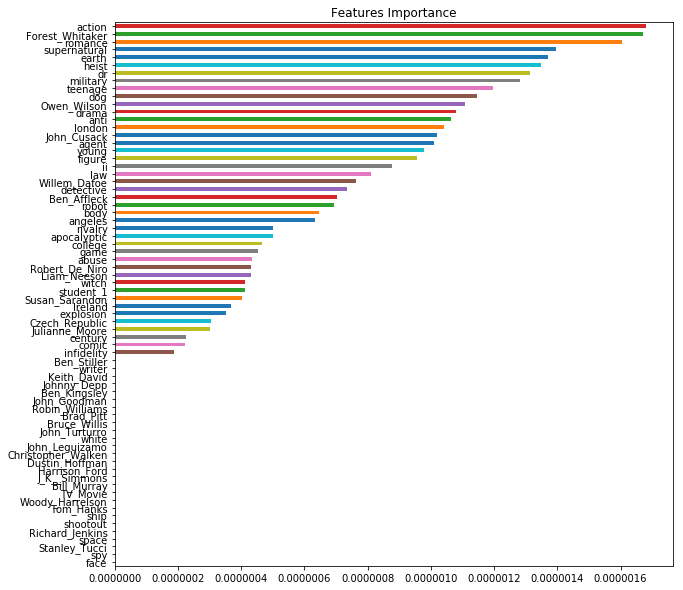

In [1152]:
lgbmodel.FI.mean(axis=1).sort_values()[180:250].plot(kind="barh",title = "Features Importance", figsize = (10,10))

In [194]:
train_data['Revenue_lgb'] = train_data["lgbfinal"]

print("RMSE model lgb :" ,score(train_data, train_data.Revenue_lgb),)

RMSE model lgb : 1.8796072404616064


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
test_data['revenue'] =  np.expm1(test_data["lgbfinal"])
test_data[['id','revenue']].to_csv('submission_lgb.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,4.173247e+06
3001,3002,2.293074e+06
3002,3003,7.928414e+06
3003,3004,1.080299e+07
3004,3005,7.253547e+05


In [1155]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_lgb.csv" -m "submission 15"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '  8%|▊         | 8.00k/100k [00:00<00:02, 32.4kB/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 66.9kB/s] ',
 'Successfully submitted to TMDB Box Office Prediction']

### Cat boosting regression

In [196]:
from catboost import Pool, CatBoostRegressor

In [197]:
catmodel = CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_state=123)

In [198]:
Kfolder.validate(train_data, test_data, features , catmodel, name="catfinal", prepare_stacking=True,
               fit_params={"use_best_model": True, "verbose": 100})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  0 :
0:	learn: 16.0664663	test: 16.2853215	best: 16.2853215 (0)	total: 129ms	remaining: 21m 32s
100:	learn: 6.4567820	test: 6.6609770	best: 6.6609770 (100)	total: 4.39s	remaining: 7m 9s
200:	learn: 3.2381693	test: 3.3881274	best: 3.3881274 (200)	total: 8.4s	remaining: 6m 49s
300:	learn: 2.3703893	test: 2.4478659	best: 2.4478659 (300)	total: 12.8s	remaining: 6m 52s
400:	learn: 2.1630757	test: 2.2030724	best: 2.2030724 (400)	total: 16.9s	remaining: 6m 44s
500:	learn: 2.0858993	test: 2.1178071	best: 2.1178071 (500)	total: 21s	remaining: 6m 37s
600:	learn: 2.0330532	test: 2.0726497	best: 2.0726497 (600)	total: 27.5s	remaining: 7m 9s
700:	learn: 1.9949105	test: 2.0374860	best: 2.0374555 (699)	total: 32.2s	remaining: 7m 7s
800:	learn: 1.9644695	test: 2.0121043	best: 2.0120291 (786)	total: 38s	remaining: 7m 16s
900:	learn: 1.9216076	test: 1.9713271	best: 1.9713271 (900)	total: 42.5s	remaining: 7m 9s
1000:	learn: 1.8769784	test: 1.9244719	best: 1.9244340 (999)	total: 47.1s	remaining: 7m 3

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  1 :
0:	learn: 16.1175461	test: 16.0221931	best: 16.0221931 (0)	total: 75.8ms	remaining: 12m 37s
100:	learn: 6.4690302	test: 6.3782572	best: 6.3782572 (100)	total: 4.47s	remaining: 7m 18s
200:	learn: 3.2271016	test: 3.1726115	best: 3.1726115 (200)	total: 8.51s	remaining: 6m 54s
300:	learn: 2.3539003	test: 2.3778646	best: 2.3778646 (300)	total: 12.6s	remaining: 6m 45s
400:	learn: 2.1361767	test: 2.2150327	best: 2.2150327 (400)	total: 16.8s	remaining: 6m 41s
500:	learn: 2.0475897	test: 2.1656372	best: 2.1656372 (500)	total: 21s	remaining: 6m 38s
600:	learn: 1.9673858	test: 2.1260654	best: 2.1260654 (600)	total: 25.1s	remaining: 6m 33s
700:	learn: 1.8998842	test: 2.0979135	best: 2.0979135 (700)	total: 29.3s	remaining: 6m 29s
800:	learn: 1.8427367	test: 2.0740798	best: 2.0738847 (795)	total: 33.5s	remaining: 6m 24s
900:	learn: 1.8040064	test: 2.0641267	best: 2.0641267 (900)	total: 37.5s	remaining: 6m 19s
1000:	learn: 1.7606266	test: 2.0511808	best: 2.0510204 (998)	total: 41.7s	remaini

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  2 :
0:	learn: 16.1018268	test: 16.1097230	best: 16.1097230 (0)	total: 55.2ms	remaining: 9m 11s
100:	learn: 6.4900459	test: 6.4298410	best: 6.4298410 (100)	total: 4.04s	remaining: 6m 35s
200:	learn: 3.2697201	test: 3.1157854	best: 3.1157854 (200)	total: 7.98s	remaining: 6m 28s
300:	learn: 2.3965350	test: 2.1872260	best: 2.1872260 (300)	total: 12.3s	remaining: 6m 37s
400:	learn: 2.1638544	test: 1.9712193	best: 1.9712193 (400)	total: 16.5s	remaining: 6m 34s
500:	learn: 2.0717607	test: 1.9111470	best: 1.9111470 (500)	total: 20.5s	remaining: 6m 29s
600:	learn: 2.0007392	test: 1.8856085	best: 1.8856085 (600)	total: 24.6s	remaining: 6m 25s
700:	learn: 1.9440143	test: 1.8678409	best: 1.8678409 (700)	total: 28.7s	remaining: 6m 20s
800:	learn: 1.8888931	test: 1.8582900	best: 1.8582883 (799)	total: 32.8s	remaining: 6m 16s
900:	learn: 1.8462362	test: 1.8468120	best: 1.8467210 (898)	total: 37.1s	remaining: 6m 14s
1000:	learn: 1.8052766	test: 1.8337385	best: 1.8337385 (1000)	total: 41.3s	remai

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  3 :
0:	learn: 16.1145174	test: 16.0451242	best: 16.0451242 (0)	total: 64.5ms	remaining: 10m 45s
100:	learn: 6.4676579	test: 6.4827259	best: 6.4827259 (100)	total: 4.14s	remaining: 6m 46s
200:	learn: 3.2134277	test: 3.3602621	best: 3.3602621 (200)	total: 8.32s	remaining: 6m 45s
300:	learn: 2.3116412	test: 2.5621708	best: 2.5621708 (300)	total: 12.4s	remaining: 6m 38s
400:	learn: 2.0865192	test: 2.3853315	best: 2.3853315 (400)	total: 16.6s	remaining: 6m 36s
500:	learn: 1.9966907	test: 2.3243395	best: 2.3243395 (500)	total: 20.5s	remaining: 6m 29s
600:	learn: 1.9375316	test: 2.2831866	best: 2.2831758 (599)	total: 24.6s	remaining: 6m 24s
700:	learn: 1.8887632	test: 2.2530028	best: 2.2530028 (700)	total: 28.8s	remaining: 6m 21s
800:	learn: 1.8432483	test: 2.2217787	best: 2.2217743 (799)	total: 32.7s	remaining: 6m 16s
900:	learn: 1.8123736	test: 2.2118784	best: 2.2112426 (885)	total: 37.2s	remaining: 6m 16s
1000:	learn: 1.7596899	test: 2.1727893	best: 2.1727893 (1000)	total: 41.2s	rema

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  4 :
0:	learn: 16.1189127	test: 16.0141128	best: 16.0141128 (0)	total: 60.2ms	remaining: 10m 1s
100:	learn: 6.4676646	test: 6.4538328	best: 6.4538328 (100)	total: 4.11s	remaining: 6m 42s
200:	learn: 3.2306899	test: 3.3368619	best: 3.3368619 (200)	total: 8.17s	remaining: 6m 38s
300:	learn: 2.3453508	test: 2.5132122	best: 2.5132122 (300)	total: 12.4s	remaining: 6m 38s
400:	learn: 2.1218960	test: 2.3023550	best: 2.3023550 (400)	total: 16.4s	remaining: 6m 31s
500:	learn: 2.0435147	test: 2.2330986	best: 2.2330986 (500)	total: 20.6s	remaining: 6m 30s
600:	learn: 1.9902182	test: 2.1934097	best: 2.1934097 (600)	total: 24.6s	remaining: 6m 24s
700:	learn: 1.9420028	test: 2.1517737	best: 2.1517737 (700)	total: 30.5s	remaining: 6m 44s
800:	learn: 1.9018134	test: 2.1290518	best: 2.1290518 (800)	total: 36s	remaining: 6m 53s
900:	learn: 1.8644318	test: 2.1095867	best: 2.1095867 (900)	total: 41.8s	remaining: 7m 2s
1000:	learn: 1.8160246	test: 2.0808356	best: 2.0808230 (999)	total: 48.1s	remaining

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold  5 :
0:	learn: 16.0953078	test: 16.1390109	best: 16.1390109 (0)	total: 145ms	remaining: 24m 12s
100:	learn: 6.4779862	test: 6.4788271	best: 6.4788271 (100)	total: 6.99s	remaining: 11m 24s
200:	learn: 3.2680288	test: 3.1824394	best: 3.1824394 (200)	total: 12.1s	remaining: 9m 51s
300:	learn: 2.3984606	test: 2.2611573	best: 2.2611573 (300)	total: 17.5s	remaining: 9m 22s
400:	learn: 2.1764147	test: 2.0388917	best: 2.0388917 (400)	total: 23.2s	remaining: 9m 16s
500:	learn: 2.0984724	test: 1.9741689	best: 1.9741689 (500)	total: 28.6s	remaining: 9m 1s
600:	learn: 2.0506964	test: 1.9448803	best: 1.9448803 (600)	total: 33.3s	remaining: 8m 40s
700:	learn: 2.0039270	test: 1.9241691	best: 1.9241691 (700)	total: 37.9s	remaining: 8m 22s
800:	learn: 1.9734550	test: 1.9147276	best: 1.9147276 (800)	total: 44s	remaining: 8m 25s
900:	learn: 1.9521322	test: 1.9112800	best: 1.9107173 (891)	total: 49s	remaining: 8m 14s
1000:	learn: 1.8934127	test: 1.8946887	best: 1.8946887 (1000)	total: 53.9s	remaining

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Final score:  1.8906914544926314


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.8906914544926314

In [199]:
train_data['Revenue_cat'] = train_data["catfinal"]

print("RMSE model cat :" ,score(train_data, train_data.Revenue_cat))

RMSE model cat : 1.8951681461274552


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
test_data['revenue'] =  np.expm1(test_data["catfinal"])
test_data[['id','revenue']].to_csv('data/submission_cat.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,1.889477e+06
3001,3002,1.017553e+06
3002,3003,4.713473e+06
3003,3004,1.001618e+07
3004,3005,9.872963e+05


In [1164]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_cat.csv" -m "submission 16"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:00<00:00, 126kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

### model combination

In [1165]:
train_data['Revenue_Dragon1'] = 0.5 * train_data["xgbfinal"] + \
                               0.5 * train_data["catfinal"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1166]:
print("RMSE model Dragon1 :" ,score(train_data, train_data.Revenue_Dragon1))

RMSE model Dragon1 : 1.8948411501050064


In [1167]:
test_data['revenue'] =  np.expm1(0.5 * test_data["catfinal"] + 0.5 * test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon1.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,2.695537e+06
3001,3002,1.079901e+06
3002,3003,6.485242e+06
3003,3004,9.371612e+06
3004,3005,8.711928e+05


In [1168]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon1.csv" -m "submission 17"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 100kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [1169]:
train_data['Revenue_Dragon2'] = 0.45 * train_data["xgbfinal"] + \
                               0.55 * train_data["catfinal"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1170]:
print("RMSE model Dragon2 :" ,score(train_data, train_data.Revenue_Dragon2))

RMSE model Dragon2 : 1.8929578824245652


In [1171]:
test_data['revenue'] =  np.expm1(0.55 * test_data["catfinal"] + 0.45 * test_data["xgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon2.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,revenue
3000,3001,2.603600e+06
3001,3002,1.076031e+06
3002,3003,6.338095e+06
3003,3004,9.430498e+06
3004,3005,8.848587e+05


In [1172]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon2.csv" -m "submission 18"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 96.2kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']

In [202]:
train_data['Revenue_Dragon3'] = 0.5 * train_data["catfinal"] + 0.5* train_data['lgbfinal']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
print("RMSE model Dragon3 :" ,score(train_data, train_data.Revenue_Dragon3))

RMSE model Dragon3 : 1.8593322705768227


In [205]:
test_data['revenue'] =  np.expm1(0.5 * test_data["catfinal"] +
                                0.5 * test_data["lgbfinal"])
test_data[['id','revenue']].to_csv('data/submission_Dragon3.csv', index=False)
test_data[['id','revenue']].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,revenue
3000,3001,2.808070e+06
3001,3002,1.527522e+06
3002,3003,6.113131e+06
3003,3004,1.040215e+07
3004,3005,8.462506e+05


In [1180]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_dragon3.csv" -m "submission 20"

['',
 '  0%|          | 0.00/100k [00:00<?, ?B/s]',
 '100%|██████████| 100k/100k [00:01<00:00, 88.7kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']